In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

# **EDA**

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.  

We have been provided three files. A description for what each of these files contain is given below:


1.     **SampleSubmission.csv**: This gives us a required format for submitting our solutions to the AV solution checker.
2.     **Train.csv**: We will use this file for training our model. It contains variables or features that we will input to our model, and the *target variable* that we want to predict.
3.     **Test.csv**: This will contain all variables in the training dataset except the *target variable*. We will use our trained model to predict the target for this dataset. 


Now lets go on to read and have a look at each of the files.

In [ ]:
ss = pd.read_csv('/content/SampleSubmission_ZxsCq0O.csv')
train = pd.read_csv('/content/Train_awoL0xl (2).csv')
test = pd.read_csv('/content/Test_QQKW4dv (2).csv')

In [ ]:
ss.head(10)

,ID,Close
0,id_713,85
1,id_714,85
2,id_715,85
3,id_716,85
4,id_717,85
5,id_718,85
6,id_719,85
7,id_720,85
8,id_721,85
9,id_722,85


Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 


#### **1. Brief look at the dataset**.

In [ ]:
train.head(3)
test.head(3)

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7


,ID,stock,Date,holiday,unpredictability_score
0,id_713,0,2019-11-01,0,7
1,id_714,0,2019-11-04,0,7
2,id_715,0,2019-11-05,0,7


In [ ]:
ID_COL, TARGET_COL = 'id', 'Close'

#### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [ ]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 73439 samples and 9 variables

Test contains 4223 samples and 5 variables

The dataset contains 8 features


#### 3. **Target Distribution**

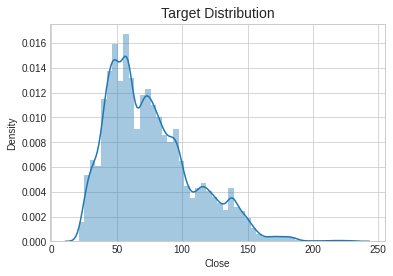

In [ ]:
_ = sns.distplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

####**4. Variable Datatypes**

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73439 entries, 0 to 73438
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      73439 non-null  object 
 1   stock                   73439 non-null  int64  
 2   Date                    73439 non-null  object 
 3   Open                    73439 non-null  float64
 4   High                    73439 non-null  float64
 5   Low                     73439 non-null  float64
 6   Close                   73439 non-null  float64
 7   holiday                 73439 non-null  int64  
 8   unpredictability_score  73439 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 5.0+ MB


#### **5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

unpredictability_score    0.0
holiday                   0.0
Close                     0.0
Low                       0.0
High                      0.0
Open                      0.0
Date                      0.0
stock                     0.0
ID                        0.0
dtype: float64

#### **6. Unique values in each variable**

In [ ]:
train.nunique()

ID                        73439
stock                     103  
Date                      713  
Open                      60702
High                      60594
Low                       61015
Close                     60352
holiday                   2    
unpredictability_score    10   
dtype: int64

In [ ]:
fltr = train['stock'] == 0
_ = sns.distplot(train[fltr][TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

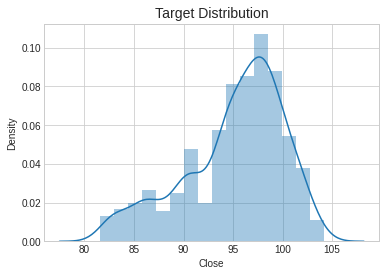

In [ ]:
fltr = train['stock'] == 57
_ = sns.distplot(train[fltr][TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

### **Time Series Plots**

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])

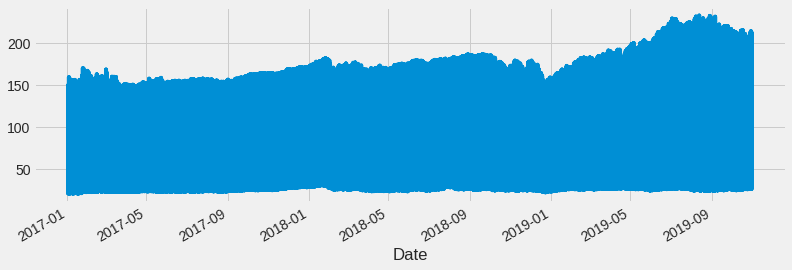

In [ ]:
_ = train.set_index('Date')['Close'].plot(figsize=(12, 4))

## **Individual Time Series Plots**

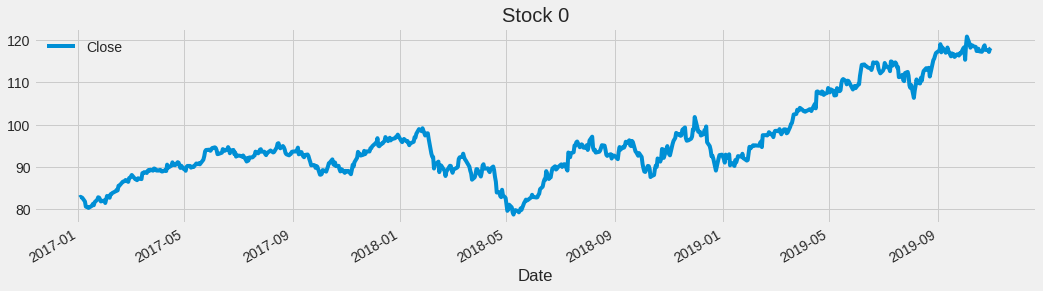

In [ ]:
STOCK_NO = 0
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

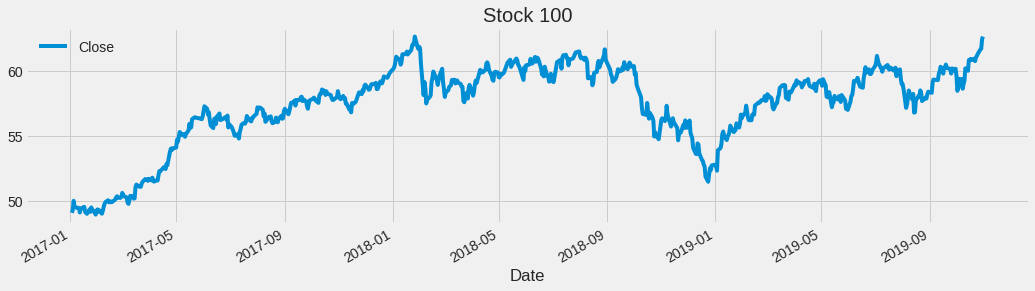

In [ ]:
STOCK_NO = 100
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

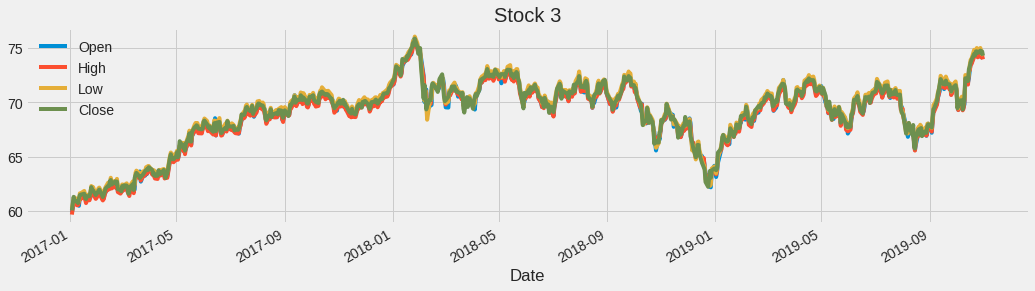

In [ ]:
STOCK_NO = 3
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Open', 'High', 'Low', 'Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

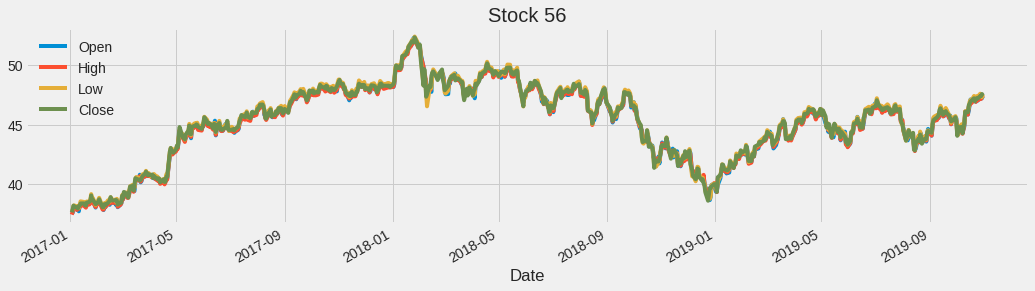

In [ ]:
STOCK_NO = 56
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Open', 'High', 'Low', 'Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

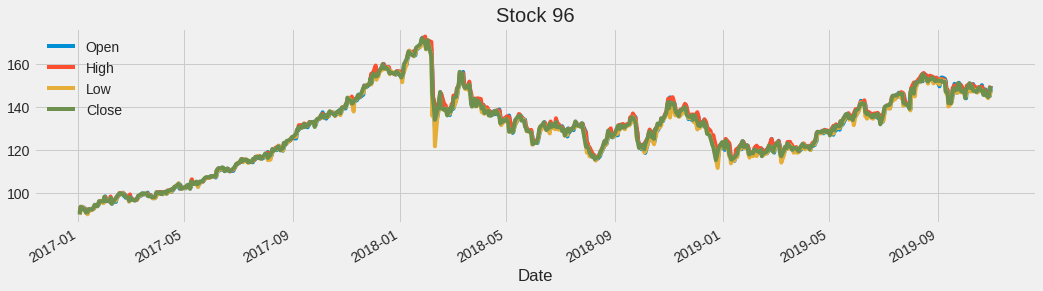

In [ ]:
STOCK_NO = 96
fltr = train['stock'] == STOCK_NO
_ = train[fltr].set_index('Date')[['Open', 'High', 'Low', 'Close']].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}')

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred) ** 0.5

## **Baseline Model - A**

In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

### Using the median value




In [ ]:
mapper = train.groupby('stock')['Close'].median()


In [ ]:
mapper

stock
0      93.4646 
1      40.8152 
2      139.1312
3      69.8034 
4      75.7312 
        ...    
98     123.3825
99     48.3986 
100    58.0797 
101    117.4639
102    133.4951
Name: Close, Length: 103, dtype: float64

In [ ]:
preds = train['stock'].map(mapper)

In [ ]:
rmse(train['Close'], preds)

9.813999354116822

In [ ]:
preds_test = test[['ID', 'stock']].copy()
preds_test['Close'] = preds_test['stock'].map(mapper)
download_preds(preds_test['Close'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train['Date']

0       2017-01-03
1       2017-01-04
2       2017-01-05
3       2017-01-06
4       2017-01-09
           ...    
73434   2019-10-25
73435   2019-10-28
73436   2019-10-29
73437   2019-10-30
73438   2019-10-31
Name: Date, Length: 73439, dtype: datetime64[ns]

### LightGBM Model

In [ ]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)

In [ ]:
df['Date'] = pd.to_datetime(df["Date"])

In [ ]:
for attr in ['year', 'month', 'day', 'week', 'dayofweek']:
  df[attr] = getattr(df['Date'].dt, attr)

In [ ]:
features = ['holiday','unpredictability_score', 'year', 'month', 'day', 'week', 'dayofweek']

In [ ]:
train, test = df[:train.shape[0]].reset_index(drop = True), df[train.shape[0]:].reset_index(drop = True)

In [ ]:
LAST_TRAINING_DAY = train['Date'].max()
DAYS_TO_VALIDATE = pd.Timedelta(days = 60)
VAL_FIRST_DAY = LAST_TRAINING_DAY - DAYS_TO_VALIDATE
LAST_TRAINING_DAY - VAL_FIRST_DAY

Timedelta('60 days 00:00:00')

In [ ]:
val_fltr = train['Date'] >= VAL_FIRST_DAY
trn, val = train[~val_fltr].reset_index(drop = True), train[val_fltr].reset_index(drop = True)

In [ ]:
features = ['stock', 'holiday', 'unpredictability_score', 'year', 'month', 'day', 'week', 'dayofweek']

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
clf = LGBMRegressor(n_estimators=1000)
clf.fit(trn[features], trn['Close'], eval_set = [(val[features], val[TARGET_COL])], verbose = 50, early_stopping_rounds=200, eval_metric='rmse')


Training until validation scores don't improve for 200 rounds.
[50]	valid_0's rmse: 7.97175	valid_0's l2: 63.5488
[100]	valid_0's rmse: 6.25517	valid_0's l2: 39.1271
[150]	valid_0's rmse: 5.72815	valid_0's l2: 32.8116
[200]	valid_0's rmse: 5.60517	valid_0's l2: 31.418
[250]	valid_0's rmse: 5.58885	valid_0's l2: 31.2352
[300]	valid_0's rmse: 5.56782	valid_0's l2: 31.0007
[350]	valid_0's rmse: 5.53745	valid_0's l2: 30.6634
[400]	valid_0's rmse: 5.52433	valid_0's l2: 30.5183
[450]	valid_0's rmse: 5.49153	valid_0's l2: 30.1569
[500]	valid_0's rmse: 5.50548	valid_0's l2: 30.3103
[550]	valid_0's rmse: 5.56911	valid_0's l2: 31.015
[600]	valid_0's rmse: 5.58011	valid_0's l2: 31.1376
[650]	valid_0's rmse: 5.59154	valid_0's l2: 31.2653
Early stopping, best iteration is:
[467]	valid_0's rmse: 5.48574	valid_0's l2: 30.0933


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pt = clf.predict(test[features])
download_preds(pt, 'lightgbm_simple.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv('lightgbm_simple.csv')

,ID,Close
0,id_713,108.209395
1,id_714,108.868592
2,id_715,109.518260
3,id_716,109.531761
4,id_717,109.504771
...,...,...
4218,id_77657,125.514855
4219,id_77658,125.480711
4220,id_77659,125.339028
4221,id_77660,131.159280


In [ ]:
preds_test_df = test.copy()
preds_test_df['Close'] = pt

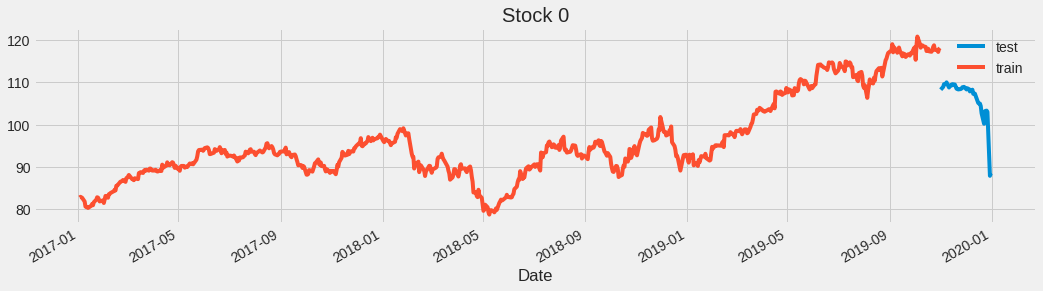

In [ ]:
STOCK_NO = 0
train_fltr = train['stock'] == STOCK_NO
train_tmp = train[train_fltr].set_index('Date')[['Close']]
train_tmp['type'] = 'train'
test_fltr = preds_test_df['stock'] == STOCK_NO
test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]
test_tmp['type'] = 'test'
_ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}', sharex=False)
_ = plt.legend()

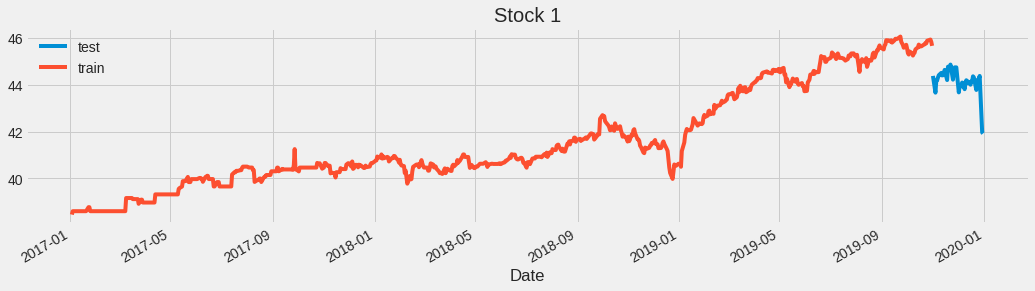

In [ ]:
STOCK_NO = 1
train_fltr = train['stock'] == STOCK_NO
train_tmp = train[train_fltr].set_index('Date')[['Close']]
train_tmp['type'] = 'train'
test_fltr = preds_test_df['stock'] == STOCK_NO
test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]
test_tmp['type'] = 'test'
_ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}', sharex=False)
_ = plt.legend()

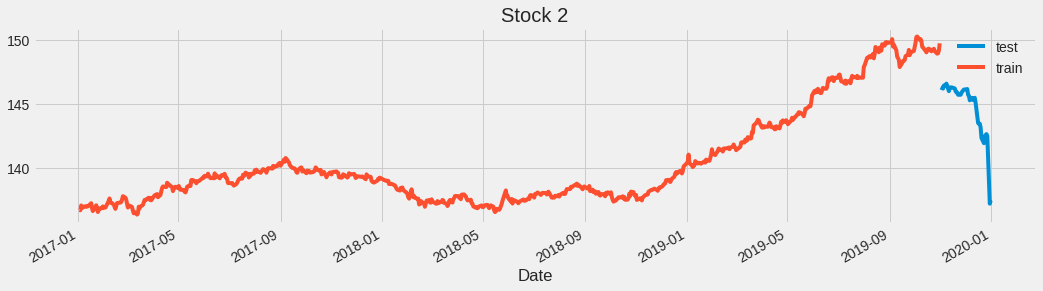

In [ ]:
STOCK_NO = 2
train_fltr = train['stock'] == STOCK_NO
train_tmp = train[train_fltr].set_index('Date')[['Close']]
train_tmp['type'] = 'train'
test_fltr = preds_test_df['stock'] == STOCK_NO
test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]
test_tmp['type'] = 'test'
_ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}', sharex=False)
_ = plt.legend()

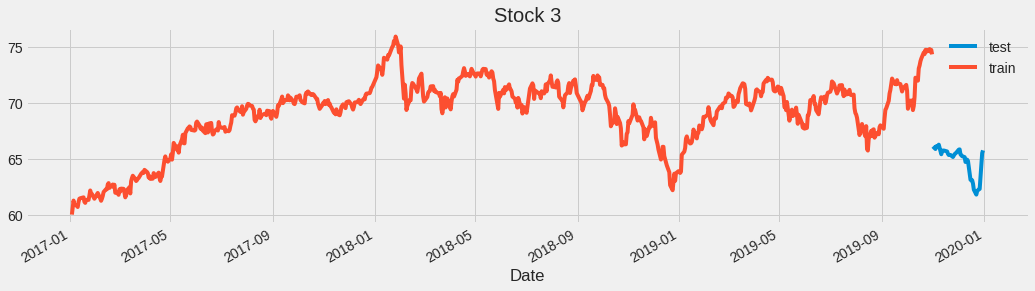

In [ ]:
STOCK_NO = 3
train_fltr = train['stock'] == STOCK_NO
train_tmp = train[train_fltr].set_index('Date')[['Close']]
train_tmp['type'] = 'train'
test_fltr = preds_test_df['stock'] == STOCK_NO
test_tmp = preds_test_df[test_fltr].set_index('Date')[['Close']]
test_tmp['type'] = 'test'
_ = train_tmp.append(test_tmp).groupby('type')['Close'].plot(figsize=(16, 4), title = f'Stock {STOCK_NO}', sharex=False)
_ = plt.legend()

Ideas you can Try:

1. Use more features in LightGBM.
2. Use traditional algorithms like ARIMA.
3. Use FBPROPHET.
4. Use Deep Learning.
5. Any other SOTA models ?